<a href="https://colab.research.google.com/github/DaveLoay/AP_TAREA_1/blob/main/AP_T1_EX2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Retropropagación en red densa

Programa el algoritmo de retropropagación usando NumPy para una tarea de clasificación bi-naria presuponiendo una red densa con dos capas ocultas. Esta red tiene una función de activación logística en todas sus neuronas y se entrena minimizando la función de pérdida de entropía cruzada binaria. Describe las fórmulas y reglas de actualización de los pesos y sesgos de cada capa y entrena y evalúa la red en algún conjunto de datos.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Dfiniendo la función de activación logística

In [2]:
def sigmoide(Z):
  return 1/(1 + np.exp(-Z))

La derivada de la función de activación logística (Sigmoide), está definida como:

$$σ(z) = σ(z)(1-σ(z))$$

In [3]:
def derivada_sigmoide(Z):
  return  np.multiply(sigmoide(Z), (1.0 - sigmoide(Z)))             

Dado que se trata de una tarea de clasificación binaria, se utiliza la función de pérdida de Entropía Cruzada Binaria (ECB), definida como:


$$
ECB(\mathbf{y}, \mathbf{\hat{y}})  = -\sum_{i=1}^N \left[ y^{(i)} \log \hat{y}^{(i)} + (1 - y^{(i)}) \log (1 - \hat{y}^{(i)}) \right]
$$

In [4]:
def entropia_cruzada_binaria(y, p):
    p[p == 0] = np.nextafter(0., 1.)
    p[p == 1] = np.nextafter(1., 0.)
    return -(np.log(p[y == 1]).sum() + np.log(1 - p[y == 0]).sum())

Asimismo, calcularemos la exactitud para medir el rendimiento del modelo aprendido por la red neuronal densa:

$$
exactitud = \frac{correctos}{total}
$$

In [5]:
def exactitud(y, y_predicha):
    return (y == y_predicha).mean() * 100

Ahora se define la función de activación hacia adelante (forward propagation) para una entrada $x^{i}$. Como la red está compuesta de 3 capas densas (2 ocultas y 1 de salida), tenemos 3 matrices de pesos con sus correspondientes vectores de sesgo $\{\mathbf{W}^{\{1\}}, \mathbf{b}^{\{1\}}\}$, $\{\mathbf{W}^{\{2\}}, \mathbf{b}^{\{2\}}\}$ y $\{\mathbf{W}^{\{3\}}, \mathbf{b}^{\{3\}}\}$ de las dos capas ocultas y la capa de salida repectivamente.

\\
De tal forma qe la propagación hacia adelante esta dad de la siguiente manera:

<!-- $$
a¹ = x^{i}\\
z² = W¹ ⋅ a¹ + b¹ \\
a^2 = σ(z²) \\
 
$$ -->

\begin{align*}
a¹ &= x^{(i)} \\
z² &= W¹ ⋅ a¹ + b¹ \\
a^2 &= σ(z²) \\
z³ &= W^2 ⋅ a² + b^2 \\
a³ &= σ(z³) \\
z⁴ &= W³ ⋅ a³ + b³ \\
a⁴ &= σ(z⁴) \\
\hat{y} &= a⁴
  \end{align*}


In [6]:
def forward_prop(x, W1, b1, W2, b2, W3, b3):

    a1 = x[:,np.newaxis]

    z2 = np.dot(W1.T, a1) + b1
    a2 = sigmoide(z2)
    
    z3 = np.dot(W2.T, a2) + b2
    a3 = sigmoide(z3)
    
    z4 = np.dot(W3.T, a3) + b3
    y_hat = sigmoide(z4)
    return z2, a2, z3, a3, z4, y_hat

Finalmente, se define la función para entrenar la red neuronal usando el descenso por gradiente. De tal forma que para calcular el gradiente de la función de perdida respecto de los pesos y los sesgos, seutiliza el algoritmo de Backpropagation. 

In [7]:
def retropropagacion(X, y, alpha = 0.01, n_epocas = 100, n_ocultas = 10):
    n_ejemplos = X.shape[0]
    n_entradas = X.shape[1]
        
    # Inicialización de las matrices de pesos W y V
    # Primera capa oculta
    W1 = np.sqrt(1.0 / n_entradas) * np.random.randn(n_entradas, n_ocultas)
    b1 = np.zeros((n_ocultas, 1))

    # Segunda capa oculta
    W2 = np.sqrt(1.0 / n_ocultas) * np.random.randn(n_ocultas, n_ocultas)
    b2 = np.zeros((n_ocultas, 1))
    
    # Capa de salida 
    W3 = np.sqrt(1.0 / n_ocultas) * np.random.randn(n_ocultas, 1)
    b3 = np.zeros((1, 1))

    perdidas = np.zeros((n_epocas))
    exactitudes = np.zeros((n_epocas))
    y_predicha = np.zeros((y.shape))
    for i in range(n_epocas):
        for j in range(n_ejemplos):
            z2, a2, z3, a3, z4, y_hat = forward_prop(X[j], W1, b1, W2, b2, W3, b3)

            # cálculo de gradiente para W3 por retropropagación
            dz4 = (y_hat - y[j]) 
            dW3 = np.outer(a3, dz4)
            db3 = dz4
          
            # cálculo de gradiente para W2 por retropropagación
            dz3 = np.dot(W3, dz4) * derivada_sigmoide(z3)
            dW2 =  np.outer(a2, dz3)
            db2 = dz3
            

            # cálculo de gradiente para W1 por retropropagación
            dz2 = np.dot(W2, dz3) * derivada_sigmoide(z2)
            dW1 =  np.outer(X[j], dz2)
            db1 = dz2
            
            ####################################
            # IMPORTANTE 
            # la actualización de los parámetros
            # debe hacerse de forma simultánea
            W3 = W3 - alpha * dW3
            b3 = b3 - alpha * dW3
            W2 = W2 - alpha * dW2
            b2 = b2 - alpha * db2
            W1 = W1 - alpha * dW1
            b1 = b1 - alpha * db1

            y_predicha[j] = y_hat
            
        # calcula la pérdida en la época
        perdidas[i] = entropia_cruzada_binaria(y, y_predicha)
        exactitudes[i] = exactitud(y, np.round(y_predicha))
        print('Epoch {0}: Pérdida = {1} Exactitud = {2}'.format(i, 
                                                              perdidas[i], 
                                                              exactitudes[i]))

    return W1, W2, W3, perdidas, exactitudes

In [8]:
def retropropagacion(X, y, alpha = 0.01, n_epocas = 100, n_ocultas = 10):
    n_ejemplos = X.shape[0]
    n_entradas = X.shape[1]
    
    # Inicialización de las matrices de pesos W y V
    # Primera capa oculta
    W1 = np.sqrt(1.0 / n_entradas) * np.random.randn(n_entradas, n_ocultas)
    b1 = np.zeros((n_ocultas, 1))

    # Segunda capa oculta
    W2 = np.sqrt(1.0 / n_ocultas) * np.random.randn(n_ocultas, n_ocultas)
    b2 = np.zeros((n_ocultas, 1))
    
    # Capa de salida 
    W3 = np.sqrt(1.0 / n_ocultas) * np.random.randn(n_ocultas, 1)
    b3 = np.zeros((1, 1))
    
    perdidas = np.zeros((n_epocas))
    exactitudes = np.zeros((n_epocas))
    y_predicha = np.zeros((y.shape))
    for i in range(n_epocas):
        for j in range(n_ejemplos):
            z2, a2, z3, a3, z4, y_hat = forward_prop(X[j], W1, b1, W2, b2, W3, b3)

            # cálculo de gradiente para W3 por retropropagación
            delta_4 = (y_hat - y[j]) 
            dW3 = np.outer(a3, delta_4)
            db3 = delta_4
          
            # cálculo de gradiente para W2 por retropropagación
            delta_3 = np.dot(W3, delta_4) * derivada_sigmoide(z3)
            dW2 =  np.outer(a2, delta_3)
            db2 = delta_3
            

            # cálculo de gradiente para W1 por retropropagación
            delta_2 = np.dot(W2, delta_3) * derivada_sigmoide(z2)
            dW1 =  np.outer(X[j], delta_2)
            db1 = delta_2

            #Actualización de los parámetros
            W3 = W3 - alpha * dW3
            b3 = b3 - alpha * db3

            W2 = W2 - alpha * dW2
            b2 = b2 - alpha * db2

            W1 = W1 - alpha * dW1
            b1 = b1 - alpha * db1

            y_predicha[j] = y_hat

            
        # calcula la pérdida en la época
        perdidas[i] = entropia_cruzada_binaria(y, y_predicha)
        exactitudes[i] = exactitud(y, np.round(y_predicha))
        print('Epoch {0}: Pérdida = {1} Exactitud = {2}'.format(i+1, 
                                                              perdidas[i], 
                                                              exactitudes[i]))

    return W1, W2, W3, perdidas, exactitudes

In [9]:
# # ejemplo (XOR)
# X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# y = np.array([[0, 1, 1, 0]]).T

# Cargando Datos

Este Dataset contiene los detalles de clientes de banco, donde la variable objetivo ('y') refleja el hecho de que el cliente deje el banco (cierre su cuenta) o continue siendo un cliente.

In [10]:
import pandas as pd

In [11]:
URL = 'https://raw.githubusercontent.com/DaveLoay/AP_TAREA_1/main/Churn_Modelling.csv'
data = pd.read_csv(URL)
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
# Separamos la última columna para que sea la variable destino
y = data[data.columns[-1]] 
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [13]:
#Eliminando las columnas inútiles 
X = data.drop(columns = ['RowNumber','Surname','CustomerId','Exited'])
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [14]:
# Haciendo un One Hot Encoding de los datos categóricos
X = pd.get_dummies(X)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


#Escalando Datos

In [15]:
from sklearn.preprocessing import StandardScaler

escalador = StandardScaler()
X = escalador.fit_transform(X)

print(X)

[[-0.32622142  0.29351742 -1.04175968 ... -0.57380915  1.09598752
  -1.09598752]
 [-0.44003595  0.19816383 -1.38753759 ...  1.74273971  1.09598752
  -1.09598752]
 [-1.53679418  0.29351742  1.03290776 ... -0.57380915  1.09598752
  -1.09598752]
 ...
 [ 0.60498839 -0.27860412  0.68712986 ... -0.57380915  1.09598752
  -1.09598752]
 [ 1.25683526  0.29351742 -0.69598177 ... -0.57380915 -0.91241915
   0.91241915]
 [ 1.46377078 -1.04143285 -0.35020386 ... -0.57380915  1.09598752
  -1.09598752]]


In [16]:
X.shape[0]

10000

# Entrenando la red

In [22]:
np.random.seed(0)
W1, W2, W3, perdidas, exactitudes = retropropagacion(X, 
                                                 y, 
                                                 alpha = 0.1, 
                                                 n_epocas = 10,
                                                 n_ocultas = 5)

Epoch 1: Pérdida = 4493.518416104231 Exactitud = 80.69
Epoch 2: Pérdida = 4210.023749709122 Exactitud = 82.76
Epoch 3: Pérdida = 4044.650637529761 Exactitud = 83.34
Epoch 4: Pérdida = 3796.412286927417 Exactitud = 84.41
Epoch 5: Pérdida = 3701.325267700702 Exactitud = 85.00999999999999
Epoch 6: Pérdida = 3644.155036118513 Exactitud = 84.92
Epoch 7: Pérdida = 3610.34602902382 Exactitud = 85.11
Epoch 8: Pérdida = 3592.0447274930593 Exactitud = 85.07000000000001
Epoch 9: Pérdida = 3577.811528872702 Exactitud = 85.19
Epoch 10: Pérdida = 3569.1227584251596 Exactitud = 85.22


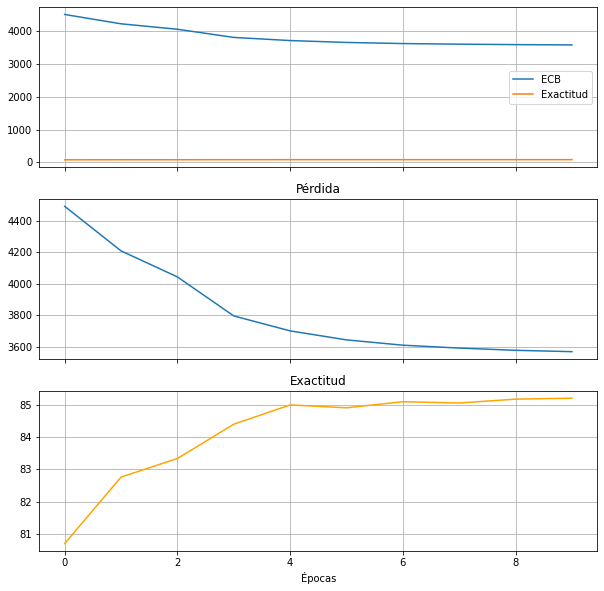

In [23]:
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize= (10,10))
ax1.plot(np.arange(perdidas.size), perdidas, label='ECB')
ax1.plot(np.arange(exactitudes.size), exactitudes, label='Exactitud')
ax1.legend()
ax1.grid(True)
ax2.plot(perdidas, label = 'ECB')
ax2.grid(True)
ax2.set_title('Pérdida')
ax3.plot(exactitudes, color = 'orange')
ax3.grid(True)
ax3.set_xlabel('Épocas')
ax3.set_title('Exactitud')

plt.show()